In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [8]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 ... 0 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 ... 0 1 0]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 ... 1 0 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 ... 1 0 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 ... 1 0 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 ... 0 1 0]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


# SVM Non-Linear

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.296 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.296 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.296 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.296 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.296 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.296 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.296 (+/-0.000) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.296 (+/-0.000) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

     Average       0.78      1.00      0.87      1019
         Bad       0.00      0.00      0.00       191
        Good       0.00      0.00      0.00       104

   

C:\Users\Tasli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


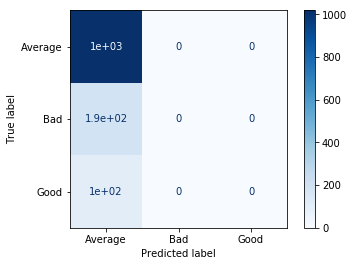

In [10]:
#Grid Search
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_macro') #f1 because of imbalanced dataset
clf.fit(X_train, y_train) 

#Evaluation

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

## K best and Percentile

## PCA

# SVM Linear

In [ ]:
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

In [ ]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

# KNN 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [7]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Best parameters set found on development set:

{'n_neighbors': 5, 'weights': 'distance'}

Grid scores on development set:

0.371 (+/-0.016) for {'n_neighbors': 5, 'weights': 'uniform'}
0.400 (+/-0.018) for {'n_neighbors': 5, 'weights': 'distance'}
0.332 (+/-0.013) for {'n_neighbors': 10, 'weights': 'uniform'}
0.384 (+/-0.009) for {'n_neighbors': 10, 'weights': 'distance'}
0.331 (+/-0.006) for {'n_neighbors': 15, 'weights': 'uniform'}
0.372 (+/-0.011) for {'n_neighbors': 15, 'weights': 'distance'}
0.324 (+/-0.012) for {'n_neighbors': 20, 'weights': 'uniform'}
0.362 (+/-0.014) for {'n_neighbors': 20, 'weights': 'distance'}
0.322 (+/-0.012) for {'n_neighbors': 25, 'weights': 'uniform'}
0.356 (+/-0.015) for {'n_neighbors': 25, 'weights': 'distance'}
0.316 (+/-0.010) for {'n_neighbors': 30, 'weights': 'uniform'}
0.354 (+/-0.014) for {'n_neighbors': 30, 'weights': 'distance'}
0.312 (+/-0.009) for {'n_neighbors': 35, 'weights': 'uniform'}
0.349 (+/-0.013) for {'n_neighbors': 35, 'weights': 'd

# Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40,

In [9]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Best parameters set found on development set:

{'max_leaf_nodes': 70, 'min_samples_split': 5}

Grid scores on development set:

0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_s

# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid=[{'var_smoothing': [1e-06, 1e-07, 1e-08, 1e-09, 1e-10,
                                            1e-11, 1e-12, 1e-13, 1e-14,
                                            1e-15]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [15]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Best parameters set found on development set:

{'var_smoothing': 1e-14}

Grid scores on development set:

0.297 (+/-0.005) for {'var_smoothing': 1e-06}
0.297 (+/-0.005) for {'var_smoothing': 1e-07}
0.297 (+/-0.005) for {'var_smoothing': 1e-08}
0.297 (+/-0.005) for {'var_smoothing': 1e-09}
0.297 (+/-0.005) for {'var_smoothing': 1e-10}
0.299 (+/-0.005) for {'var_smoothing': 1e-11}
0.310 (+/-0.009) for {'var_smoothing': 1e-12}
0.349 (+/-0.015) for {'var_smoothing': 1e-13}
0.482 (+/-0.013) for {'var_smoothing': 1e-14}
0.481 (+/-0.014) for {'var_smoothing': 1e-15}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

     Average       0.81      0.80      0.81      1019
         Bad       0.34      0.46      0.39       191
        Good       0.24      0.12      0.15       104

    accuracy                           0.70      1314
   macro avg       0.46   